#### import lib

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### baca dataset

In [3]:
df = pd.read_csv('uefa.csv')
df.head()

,Group,Position,Code,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
0,Group A,1,NAP,Napoli,6,5,0,1,20,6,14,15
1,Group A,2,LIV,Liverpool,6,5,0,1,17,6,11,15
2,Group A,3,AJA,Ajax Amsterdam,6,2,0,4,11,16,-5,6
3,Group A,4,RAN,Rangers,6,0,0,6,2,22,-20,0
4,Group B,1,POR,FC Porto,6,4,0,2,12,7,5,12


### Informasi Awal

1. Peringkat (Position) tiap tim dalam setiap grup.
2. Jumlah pertandingan yang dimainkan (Games Played) oleh setiap tim.
3. Jumlah kemenangan (Wins), hasil imbang (Draws), dan kekalahan (Losses) dari setiap tim.
4. Jumlah gol yang dicetak (Goals_For) oleh setiap tim.
5. Jumlah gol yang diterima (Goals_Against) oleh setiap tim.
6. Selisih gol (Goal_Difference) antara gol yang dicetak dan gol yang diterima oleh setiap tim.
7. Jumlah poin (Points) yang diperoleh oleh setiap tim.

### Overview Data

In [4]:
df.shape

(32, 12)

###### Apakah ada features yang data type-nya tidak sesuai?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Group            32 non-null     object
 1   Position         32 non-null     int64 
 2   Code             32 non-null     object
 3   Name             32 non-null     object
 4   Games Played     32 non-null     int64 
 5   Wins             32 non-null     int64 
 6   Draws            32 non-null     int64 
 7   Losses           32 non-null     int64 
 8   Goals_For        32 non-null     int64 
 9   Goals_Against    32 non-null     int64 
 10  Goal_Difference  32 non-null     int64 
 11  Points           32 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 3.1+ KB


In [6]:
df.describe()

,Position,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
count,32.000000,32.0,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.500000,6.0,2.406250,1.18750,2.406250,9.500000,9.500000,0.000000,8.406250
std,1.135924,0.0,1.662865,1.06066,1.701221,4.846016,5.346087,8.958687,4.798248
min,1.000000,6.0,0.000000,0.00000,0.000000,1.000000,2.000000,-20.000000,0.000000
25%,1.750000,6.0,1.000000,0.00000,1.000000,5.750000,6.000000,-4.250000,5.000000
50%,2.500000,6.0,2.000000,1.00000,2.000000,8.500000,8.000000,0.000000,8.000000
75%,3.250000,6.0,4.000000,2.00000,3.250000,12.250000,12.000000,5.250000,12.250000
max,4.000000,6.0,6.000000,3.00000,6.000000,20.000000,24.000000,16.000000,18.000000


### Cleaning

In [7]:
df['Group'] = df['Group'].str.split().str[1]
df.head()

,Group,Position,Code,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
0,A,1,NAP,Napoli,6,5,0,1,20,6,14,15
1,A,2,LIV,Liverpool,6,5,0,1,17,6,11,15
2,A,3,AJA,Ajax Amsterdam,6,2,0,4,11,16,-5,6
3,A,4,RAN,Rangers,6,0,0,6,2,22,-20,0
4,B,1,POR,FC Porto,6,4,0,2,12,7,5,12


#### Kolom yang kurang relevan ?

In [8]:
df = df.drop(columns=['Code'])

#### Buat kolom Goal Dif baru

In [83]:
df['GoalDiff'] = df['Goals_For'] - df['Goals_Against']
df.head()

df = df[['Group', 'Position', 'Name', 'Games Played', 'Wins', 'Draws', 'Losses', 'Goals_For', 'Goals_Against', 'GoalDiff', 'Points']]
df.head()

,Group,Position,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,GoalDiff,Points
0,A,1,Napoli,6,5,0,1,20,6,14,15
1,A,2,Liverpool,6,5,0,1,17,6,11,15
2,A,3,Ajax Amsterdam,6,2,0,4,11,16,-5,6
3,A,4,Rangers,6,0,0,6,2,22,-20,0
4,B,1,FC Porto,6,4,0,2,12,7,5,12


##### Duplicates?

In [9]:
df.duplicated().sum()


0

##### Missing Values ?

In [10]:
df.isna().sum().sort_values(ascending=False)

Group              0
Position           0
Name               0
Games Played       0
Wins               0
Draws              0
Losses             0
Goals_For          0
Goals_Against      0
Goal_Difference    0
Points             0
dtype: int64

### Outlier ?

In [11]:
df.columns

Index(['Group', 'Position', 'Name', 'Games Played', 'Wins', 'Draws', 'Losses',
       'Goals_For', 'Goals_Against', 'Goal_Difference', 'Points'],
      dtype='object')

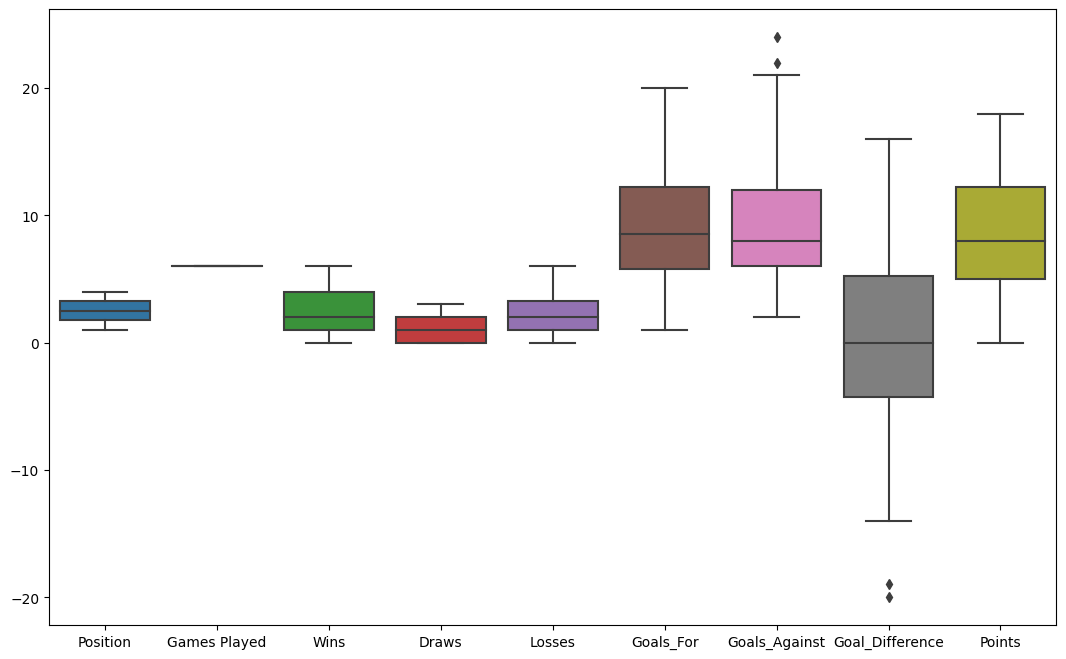

In [12]:
df_to_plot = df.select_dtypes(include=['float','int'])
plt.figure(figsize=(13, 8))  # Ubah ukuran plot menjadi lebih lebar
sns.boxplot(data=df_to_plot)
plt.show()

In [13]:
df

,Group,Position,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
0,A,1,Napoli,6,5,0,1,20,6,14,15
1,A,2,Liverpool,6,5,0,1,17,6,11,15
2,A,3,Ajax Amsterdam,6,2,0,4,11,16,-5,6
3,A,4,Rangers,6,0,0,6,2,22,-20,0
4,B,1,FC Porto,6,4,0,2,12,7,5,12
5,B,2,Club Brugge,6,3,2,1,7,4,3,11
6,B,3,Bayer Leverkusen,6,1,2,3,4,8,-4,5
7,B,4,Atletico Madrid,6,1,2,3,5,9,-4,5
8,C,1,Bayern Munich,6,6,0,0,18,2,16,18
9,C,2,Internazionale,6,3,1,2,10,7,3,10


###  Sort By

##### by wins

In [14]:
df.sort_values(by='Wins', ascending=False).head(10)

,Group,Position,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
8,C,1,Bayern Munich,6,6,0,0,18,2,16,18
0,A,1,Napoli,6,5,0,1,20,6,14,15
1,A,2,Liverpool,6,5,0,1,17,6,11,15
29,H,2,Paris Saint-Germain,6,4,2,0,16,7,9,14
28,H,1,Benfica,6,4,2,0,16,7,9,14
24,G,1,Manchester City,6,4,2,0,14,2,12,14
21,F,2,RB Leipzig,6,4,0,2,13,9,4,12
20,F,1,Real Madrid,6,4,1,1,15,6,9,13
16,E,1,Chelsea,6,4,1,1,10,4,6,13
4,B,1,FC Porto,6,4,0,2,12,7,5,12


##### by point


In [15]:
df.sort_values(by='Points', ascending=False).head(10)

,Group,Position,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
8,C,1,Bayern Munich,6,6,0,0,18,2,16,18
0,A,1,Napoli,6,5,0,1,20,6,14,15
1,A,2,Liverpool,6,5,0,1,17,6,11,15
29,H,2,Paris Saint-Germain,6,4,2,0,16,7,9,14
28,H,1,Benfica,6,4,2,0,16,7,9,14
24,G,1,Manchester City,6,4,2,0,14,2,12,14
20,F,1,Real Madrid,6,4,1,1,15,6,9,13
16,E,1,Chelsea,6,4,1,1,10,4,6,13
4,B,1,FC Porto,6,4,0,2,12,7,5,12
21,F,2,RB Leipzig,6,4,0,2,13,9,4,12


##### by Goal Diff

In [16]:
df.sort_values(by='Goal_Difference', ascending=False).head(10)

,Group,Position,Name,Games Played,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference,Points
8,C,1,Bayern Munich,6,6,0,0,18,2,16,18
0,A,1,Napoli,6,5,0,1,20,6,14,15
24,G,1,Manchester City,6,4,2,0,14,2,12,14
1,A,2,Liverpool,6,5,0,1,17,6,11,15
29,H,2,Paris Saint-Germain,6,4,2,0,16,7,9,14
28,H,1,Benfica,6,4,2,0,16,7,9,14
20,F,1,Real Madrid,6,4,1,1,15,6,9,13
16,E,1,Chelsea,6,4,1,1,10,4,6,13
25,G,2,Borussia Dortmund,6,2,3,1,10,5,5,9
17,E,2,AC Milan,6,3,1,2,12,7,5,10


### Cari Insight

#### Total Pertandingan Semua Grup

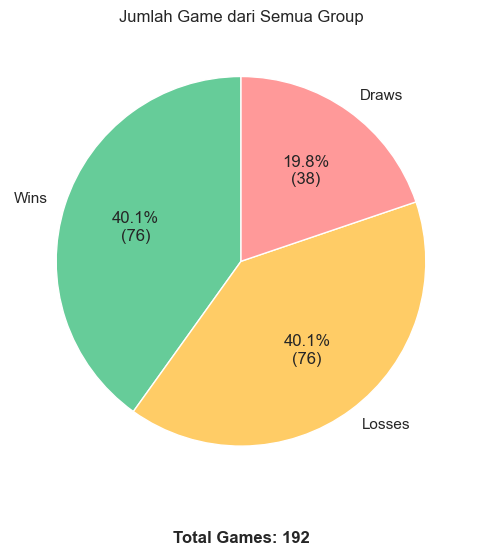

In [17]:
# Menyiapkan Variabel Proporsi
wins_count = df['Wins'].sum()
losses_count = df['Losses'].sum()
draws_count = df['Draws'].sum()
total_games = df['Games Played'].sum()

# Menyiapkan Data untuk chart
labels = ['Wins', 'Losses', 'Draws']
sizes = [wins_count, losses_count, draws_count]
colors = ['#66CC99', '#FFCC66', '#FF9999']

# Membuat pie chart menggunakan seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.color_palette("pastel")
plt.title('Jumlah Game dari Semua Group')
patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: f'{pct:.1f}%\n({int(pct * total_games / 100)})', startangle=90)

# Tambahkan label total pertandingan
plt.annotate(f'Total Games: {total_games}', (0.5, -0.1), xycoords='axes fraction', ha='center', va='center', fontsize=12, fontweight='bold')

# Tambahkan label jumlah setiap proporsi
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()

#### Perbandingan Poin antar Grup

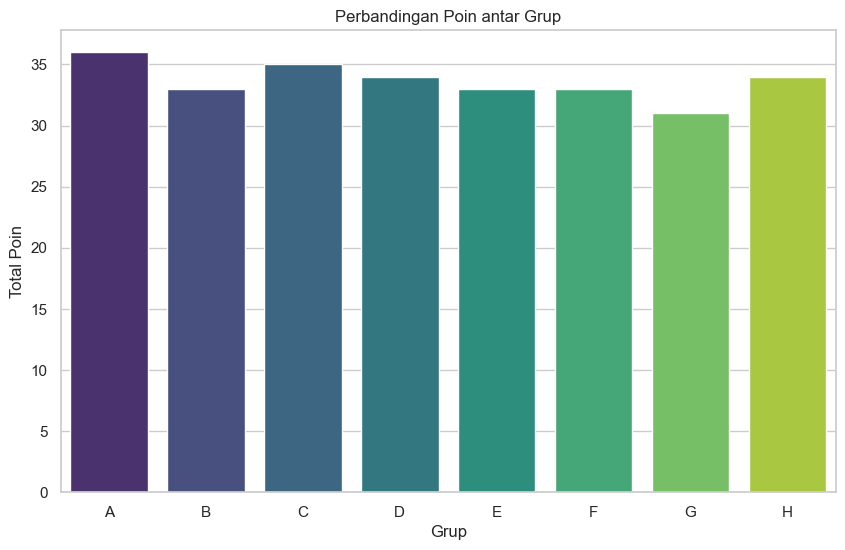

In [63]:
# Menghitung jumlah poin per grup
total_points_per_group = df.groupby('Group')['Points'].sum()

# Visualisasi perbandingan poin antar grup menggunakan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_points_per_group.index, y=total_points_per_group.values, palette='viridis')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Grup')
plt.ylabel('Total Poin')
plt.title('Perbandingan Poin antar Grup')

# Menampilkan grafik
plt.show()


#### Perbandingan Poin antar Tim

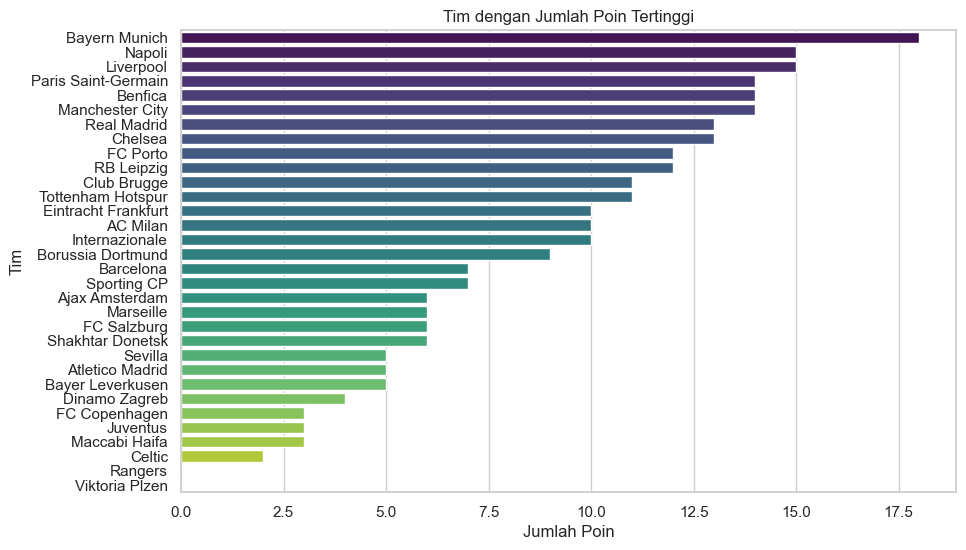

In [64]:
# Mengurutkan tim berdasarkan jumlah poin secara menurun
sorted_teams = df.sort_values(by='Points', ascending=False)

# Visualisasi jumlah poin tim menggunakan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Points', y='Name', data=sorted_teams, palette='viridis')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Jumlah Poin')
plt.ylabel('Tim')
plt.title('Tim dengan Jumlah Poin Tertinggi')

# Menampilkan grafik
plt.show()


#### Perbandingan Tim berdasarkan Draw

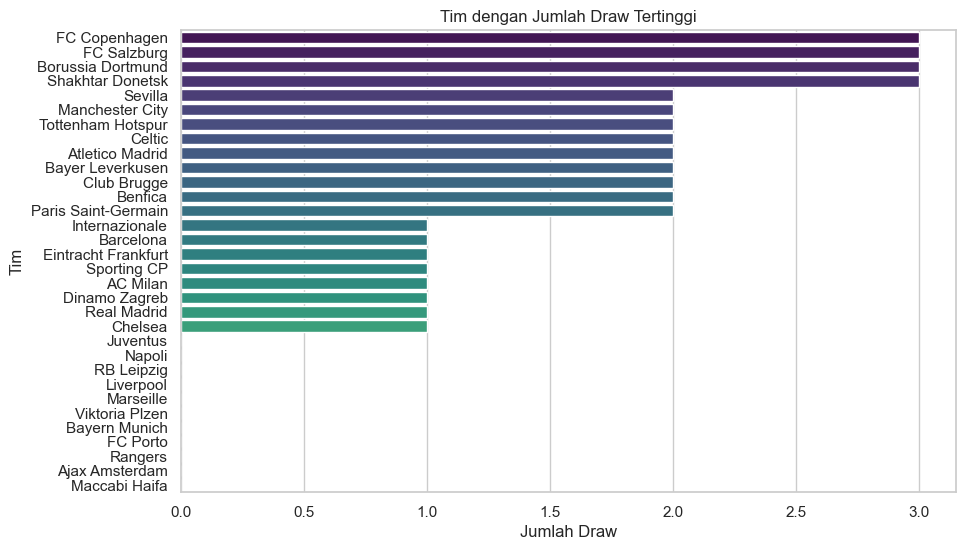

In [68]:
# Mengurutkan tim berdasarkan jumlah poin secara menurun
sorted_teams = df.sort_values(by='Draws', ascending=False)

# Visualisasi jumlah poin tim menggunakan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Draws', y='Name', data=sorted_teams, palette='viridis')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Jumlah Draw')
plt.ylabel('Tim')
plt.title('Tim dengan Jumlah Draw Tertinggi')

# Menampilkan grafik
plt.show()


#### Goal Dif setiap tim

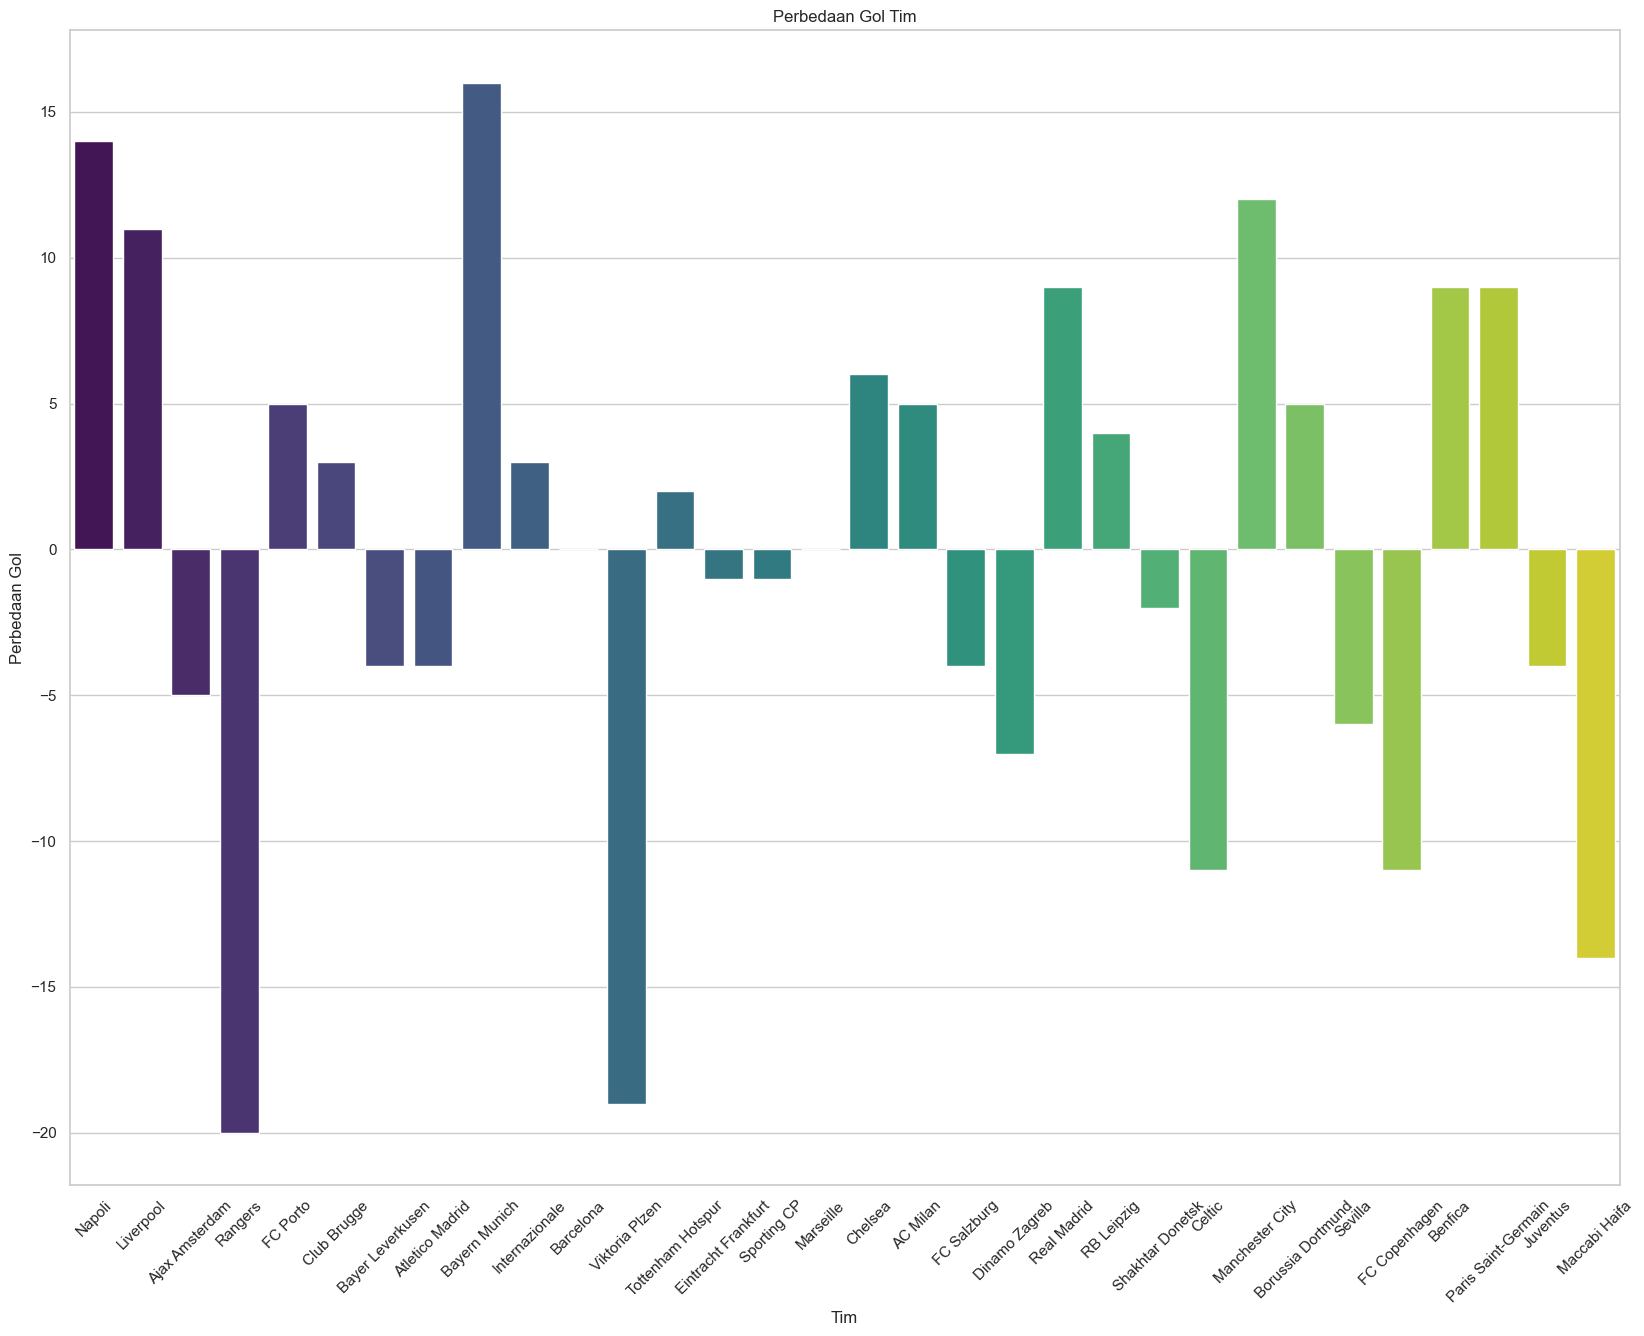

In [82]:
# Visualisasi perbedaan gol menggunakan bar chart
plt.figure(figsize=(20, 15))
sns.barplot(x='Name', y='GoalDiff', data=df, palette='viridis')
plt.title('Perbedaan Gol Tim')
plt.xlabel('Tim')
plt.ylabel('Perbedaan Gol')
plt.xticks(rotation=45)
plt.show()